## Predict age of abalone

Predicting the age of abalone from physical measurements. The age of abalone
is determined by cutting the shell through the cone,
staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

In [1137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [1138]:
df=pd.read_csv("C:/Users/97254/.conda/abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [1139]:
df.shape

(4177, 9)

### We have 9 features: 

- Sex : M, F, and I (infant)
- Length: Longest shell measurement
- Diameter: Perpendicular to length
- Height: With meat in shell
- Whole weight: Whole abalone
- Shucked weight: Weight of meat
- Viscera weight: Gut weight (after bleeding)
- Shell weight: After being dried
- Rings:according to the research, +1.5 gives the age in years

### As Rings: +1.5 gives the age in years , So we will replace rings with age

In [1140]:
df['Age']=df['Rings']+1.5
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [1141]:
df.drop('Rings',axis=1,inplace = True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [1142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [1143]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

- All numerical features but 'sex'
- We have 0 null data, so we can move on

In [1144]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


* The mean age is 11.4

In [1145]:
df.loc[df['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


In [1146]:
df=df[df['Height']!=0]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


# visualization and some conclusions from the data

### Correlation matrix

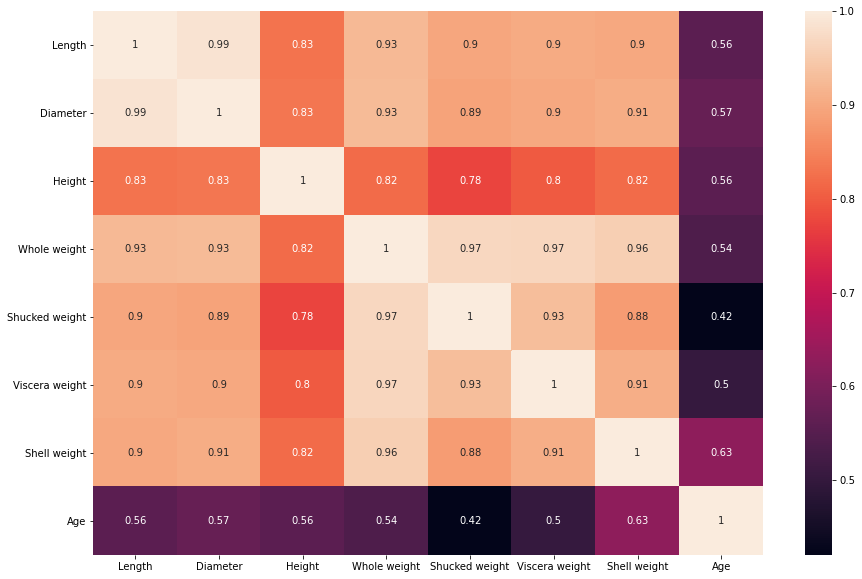

In [1147]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Observations:


- There is lot of correlation between various features with each other.
- There is no direct correlation of any feature with our target variable 'Age'.
- The above correlation map helps us to understand and relate the biological studies on abalone.

**The correlation between the features to the age**

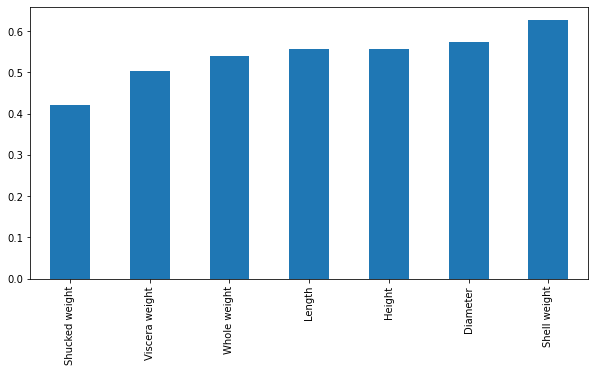

In [1148]:
df.corr()['Age'].sort_values().drop('Age').plot(kind='bar',figsize=(10,5))

**The correlation between the features**

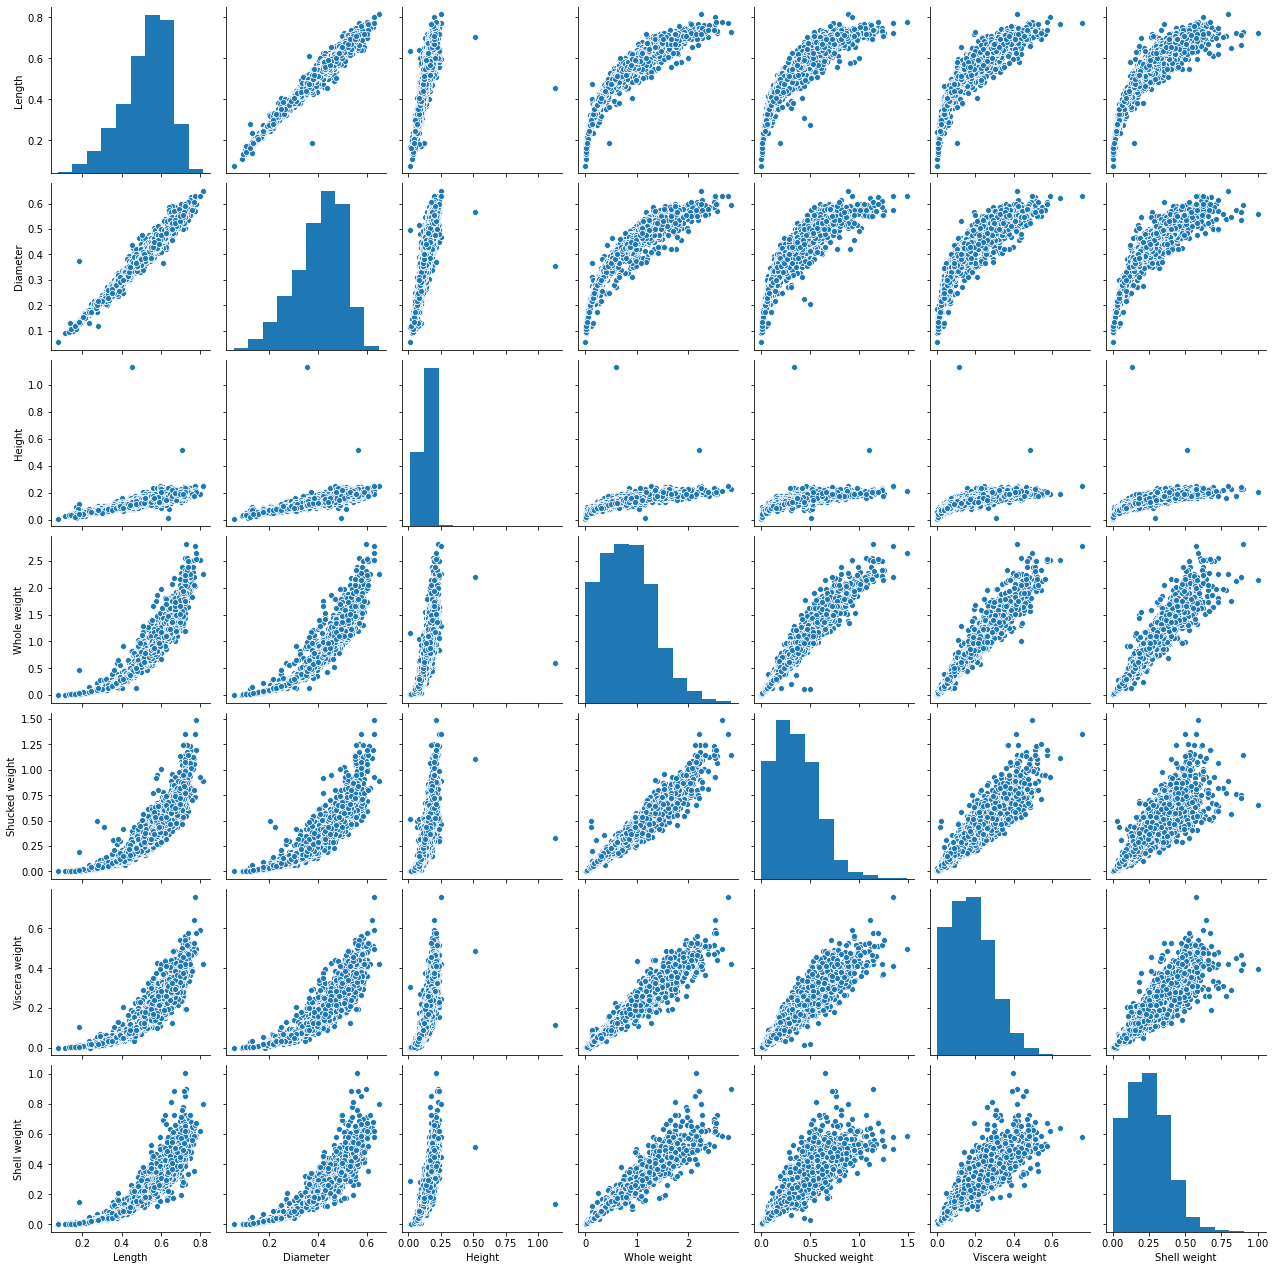

In [1149]:
slice_df=df.drop('Age',axis=1)
sns.pairplot(slice_df[slice_df.select_dtypes(include=[np.number]).columns])

**Observations**

Supporting our heatmap we can see strong linear relatioships between:
- Length vs Diameter
- Whole weight vs Shucked Weight
- Whole weight vs Viscera Weight

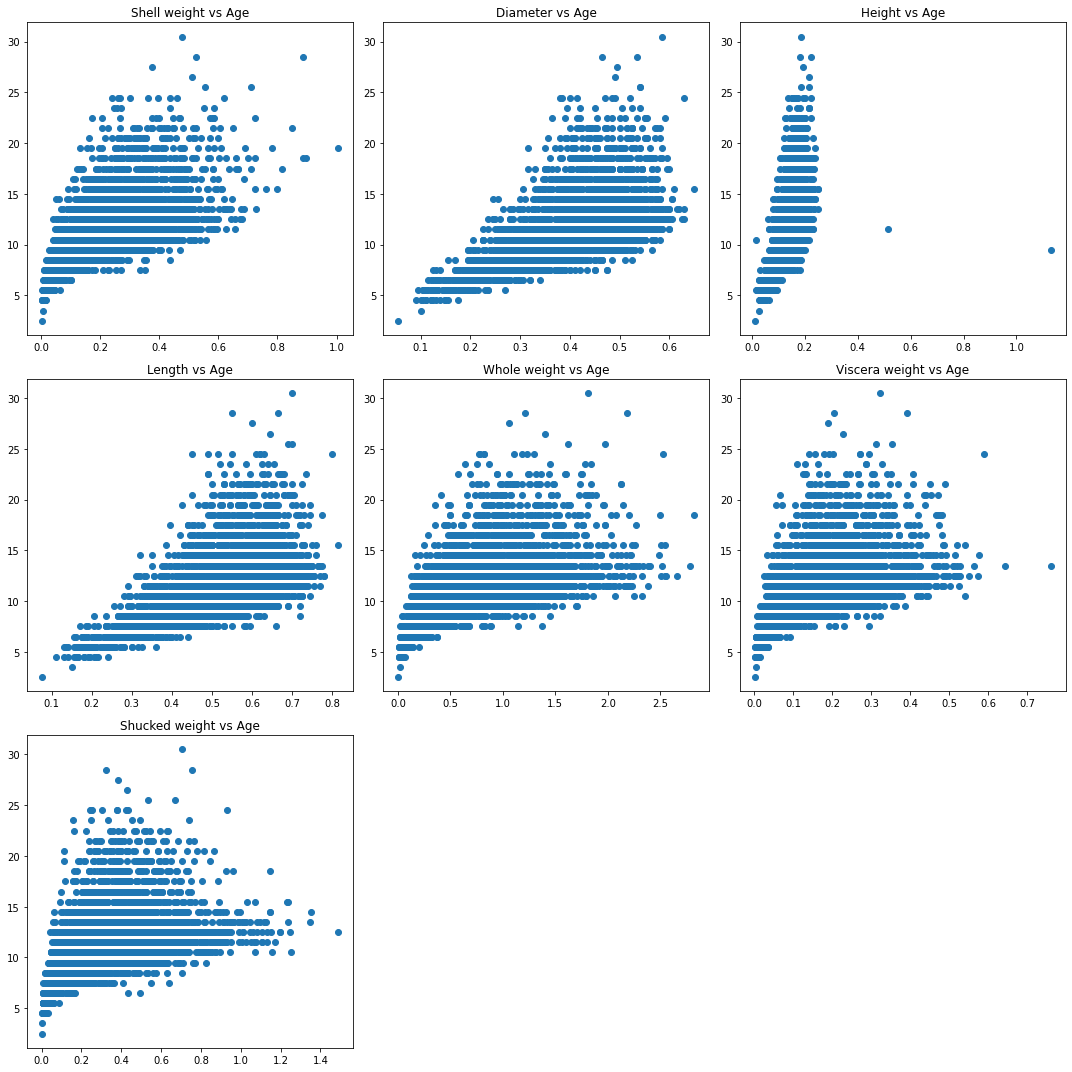

In [1150]:
plt.figure(figsize=(15, 15))

plt.subplot(3,3,1)
plt.title('Shell weight vs Age')
plt.scatter(df['Shell weight'],df['Age'])

plt.subplot(3,3,2)
plt.title('Diameter vs Age')
plt.scatter(df['Diameter'],df['Age'])

plt.subplot(3,3,3)
plt.title('Height vs Age')
plt.scatter(df['Height'],df['Age'])

plt.subplot(3,3,4)
plt.title('Length vs Age')
plt.scatter(df['Length'],df['Age'])

plt.subplot(3,3,5)
plt.title('Whole weight vs Age')
plt.scatter(df['Whole weight'],df['Age'])

plt.subplot(3,3,6)
plt.title('Viscera weight vs Age')
plt.scatter(df['Viscera weight'],df['Age'])

plt.subplot(3,3,7)
plt.title('Shucked weight vs Age')
plt.scatter(df['Shucked weight'],df['Age'])

plt.tight_layout()

- there seems to be few outliers at 'Height' column, we can remove them outliers

In [1151]:
df =df[df.Height < 0.4] 
df= (df[df["Shucked weight"]<1.4])


### Age and sex 

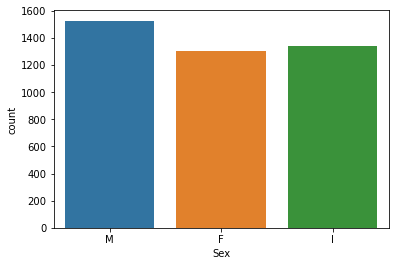

In [1152]:
sns.countplot(x = 'Sex', data = df)

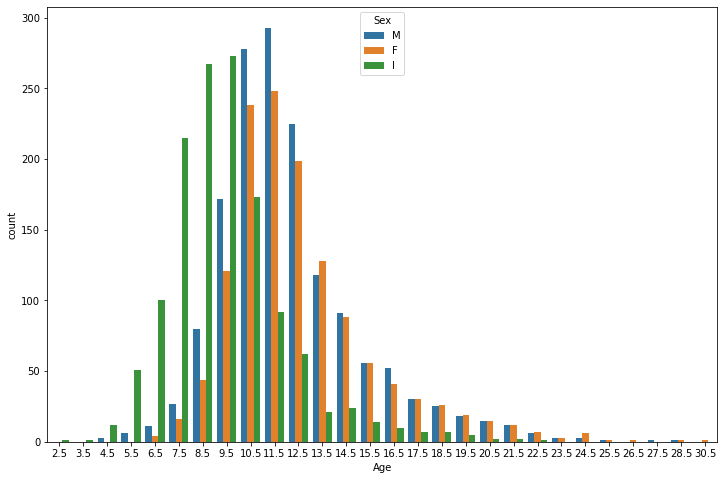

In [1153]:
plt.figure(figsize=(12,8))
sn = sns.countplot(x='Age',data=df, hue='Sex')

In [1154]:
sex_df = df.groupby(['Sex'])
sex_df['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1305.0,12.631801,3.105424,6.5,10.5,11.5,13.5,30.5
I,1340.0,9.391791,2.512896,2.5,7.5,9.5,10.5,22.5
M,1527.0,12.205959,3.027287,4.5,10.5,11.5,13.5,28.5


In [1155]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [1156]:
# Make copy to avoid changing original data 
label_data = df.copy()

# in each column, change each label to a number
object_cols = ['Sex']
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [1157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

In [1158]:
X =label_data.drop(labels="Age",axis=1)
y =label_data["Age"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [1159]:
logreg = LinearRegression()
l=logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
metrics.r2_score(y_test,y_pred)


0.5793874227450518

In [1160]:
print("R2:", round(metrics.r2_score(y_test, y_pred), 4))
print("MAE:", round(metrics.mean_absolute_error(y_test, y_pred),4))
print("MSE:", round(metrics.mean_squared_error(y_test, y_pred),4))
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))

R2: 0.5794
MAE: 1.541
MSE: 4.5808
RMSE: 2.1403
